# Heart Disease Prediction

In [ ]:
!gdown 1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN -O "data/cleveland.csv"

In [ ]:
!pip install -r requirements.txt

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    StackingClassifier, 
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier
)
from xgboost import XGBClassifier

## Load Dataset

In [3]:
df = pd.read_csv("data/cleveland.csv", header=None)
df.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


## Data Preprocessing

In [5]:
df["target"] = df["target"].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df["thal"] = df["thal"].fillna(df["thal"].mean())
df["ca"] = df["ca"].fillna(df["ca"].mean())

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df["target"].value_counts()

target
0    164
1    139
Name: count, dtype: int64

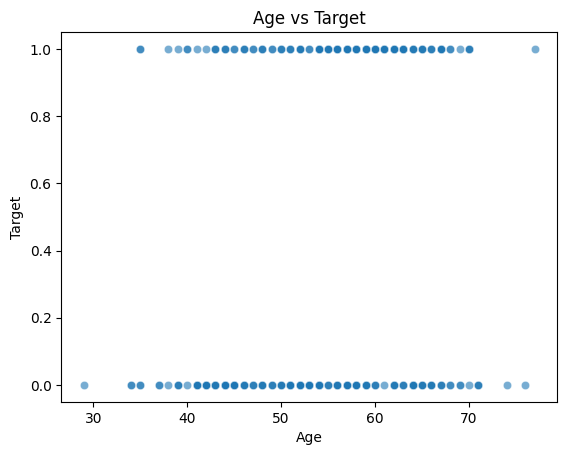

In [8]:
sns.scatterplot(data=df, x="age", y="target", alpha=0.6)
plt.title('Age vs Target')
plt.xlabel('Age')
plt.ylabel('Target')
plt.show()

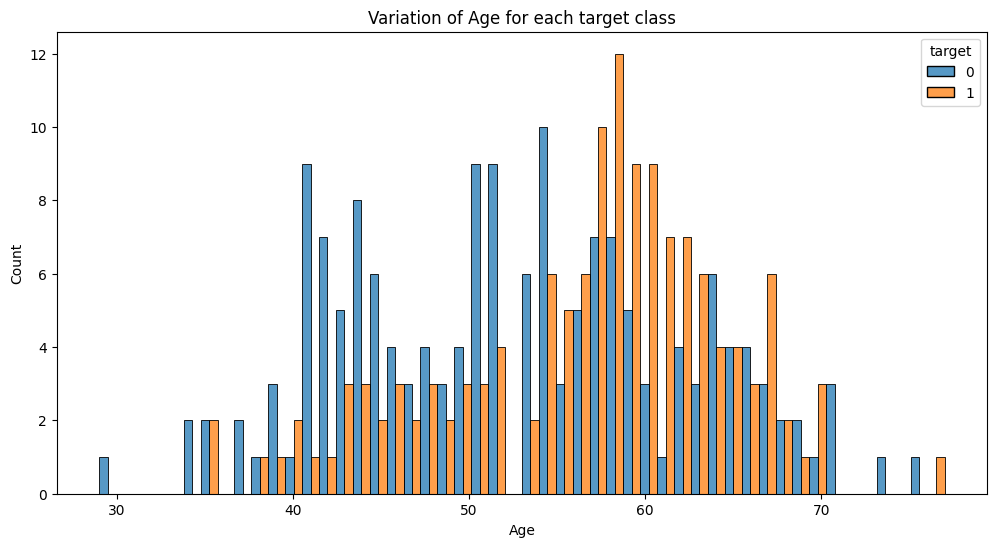

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='target', multiple='dodge',bins=50 , legend=True)
plt.title("Variation of Age for each target class")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [21]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((242, 13), (61, 13))

## KNN

In [26]:
knn_classifier = KNeighborsClassifier(
    n_neighbors=5, 
    weights="uniform", 
    algorithm="auto", 
    leaf_size=30, 
    p=2, 
    metric="minkowski"
)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

In [28]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Training Set:')
print(cm_train)
print('Confusion Matrix for Test Set:')
print(cm_test)

Confusion Matrix for Training Set:
[[107  28]
 [ 31  76]]
Confusion Matrix for Test Set:
[[22  7]
 [12 20]]


In [29]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


## SVM


In [30]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [31]:
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

In [32]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Training Set:')
print(cm_train)
print('Confusion Matrix for Test Set:')
print(cm_test)

Confusion Matrix for Training Set:
[[114  21]
 [ 61  46]]
Confusion Matrix for Test Set:
[[26  3]
 [17 15]]


In [33]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)

print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


## Naive Bayes

In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [35]:
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

In [36]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Training Set:')
print(cm_train)
print('Confusion Matrix for Test Set:')
print(cm_test)

Confusion Matrix for Training Set:
[[122  13]
 [ 24  83]]
Confusion Matrix for Test Set:
[[26  3]
 [ 7 25]]


In [37]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


## Decision Tree

In [38]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [39]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [40]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Training Set:')
print(cm_train)
print('Confusion Matrix for Test Set:')
print(cm_test)

Confusion Matrix for Training Set:
[[135   0]
 [  0 107]]
Confusion Matrix for Test Set:
[[22  7]
 [ 9 23]]


In [41]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))
print('Accuracy for test set for cision Tree = {}'.format(accuracy_for_test))

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for cision Tree = 0.74


## Random Forest

In [42]:
rf = RandomForestClassifier(criterion="gini", max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [43]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [44]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Training Set:')
print(cm_train)
print('Confusion Matrix for Test Set:')
print(cm_test)

Confusion Matrix for Training Set:
[[133   2]
 [  2 105]]
Confusion Matrix for Test Set:
[[25  4]
 [ 8 24]]


In [45]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


## AdaBoost

In [47]:
ada_boost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ada_boost.fit(X_train, y_train)

c:\Users\LinhLinh\anaconda3\envs\py311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [48]:
y_train_pred = ada_boost.predict(X_train)
y_test_pred = ada_boost.predict(X_test)

In [49]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Training Set:')
print(cm_train)
print('Confusion Matrix for Test Set:')
print(cm_test)

Confusion Matrix for Training Set:
[[126   9]
 [ 12  95]]
Confusion Matrix for Test Set:
[[26  3]
 [ 7 25]]


In [50]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for AdaBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoost = {}'.format(accuracy_for_test))

Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


## GradientBoost

In [64]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, min_samples_split=2)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [65]:
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [66]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Training Set:')
print(cm_train)
print('Confusion Matrix for Test Set:')
print(cm_test)

Confusion Matrix for Training Set:
[[135   0]
 [  1 106]]
Confusion Matrix for Test Set:
[[25  4]
 [ 5 27]]


In [67]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoost = {}'.format(accuracy_for_test))

Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


## XGBoost

In [95]:
xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [96]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [97]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Training Set:')
print(cm_train)
print('Confusion Matrix for Test Set:')
print(cm_test)

Confusion Matrix for Training Set:
[[135   0]
 [  0 107]]
Confusion Matrix for Test Set:
[[26  3]
 [ 5 27]]


In [98]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)

print('Accuracy for training set for XGBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBoost = {}'.format(accuracy_for_test))

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


## Stacking

In [99]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

In [100]:
base_classifiers = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('xgb', xgb),
    ('gc', gc),
    ('svc', svc),
    ('ad', ad)
]

stacking_model = StackingClassifier(
    estimators=base_classifiers,
    cv=5
)

stacking_model.fit(X_train, y_train)

c:\Users\LinhLinh\anaconda3\envs\py311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LinhLinh\anaconda3\envs\py311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LinhLinh\anaconda3\envs\py311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LinhLinh\anaconda3\envs\py311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm t

StackingClassifier(cv=5,
                   estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categoric...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('gc',
                                GradientBoostingClassifier(random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('ad', AdaBoostClassifier(random_state=42))])

In [101]:
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

In [102]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix for Training Set:')
print(cm_train)
print('Confusion Matrix for Test Set:')
print(cm_test)

Confusion Matrix for Training Set:
[[135   0]
 [  0 107]]
Confusion Matrix for Test Set:
[[27  2]
 [ 5 27]]


In [103]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)

print('Accuracy for training set for XGBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBoost = {}'.format(accuracy_for_test))

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.89
